In [1]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

In [2]:
train_dir= 'Animal_Dataset_Sorted/train'
test_dir='Animal_Dataset_Sorted/test'

Bear sample size :  87 

Brown bear sample size :  108 

Bull sample size :  47 

Cheetah sample size :  132 

Crocodile sample size :  108 

Elephant sample size :  155 

Jaguar sample size :  100 

Leopard sample size :  123 

Lion sample size :  208 

Polar bear sample size :  229 

Rhinoceros sample size :  214 

Tiger sample size :  313 

training data size : 1824


<BarContainer object of 12 artists>

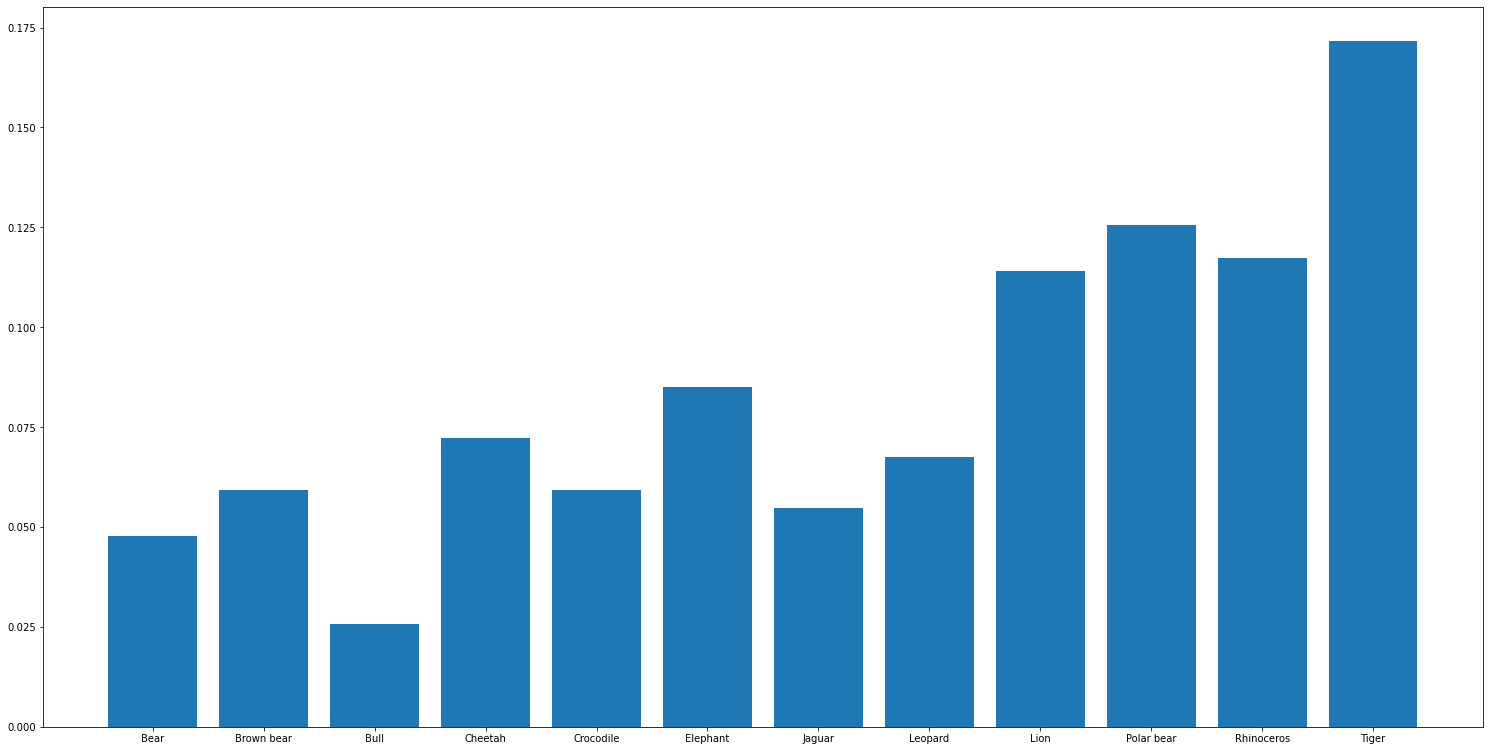

In [3]:
train_image_bear = len(os.listdir("Animal_Dataset_Sorted/train/Bear"))-1
train_image_brown_bear = len(os.listdir("Animal_Dataset_Sorted/train/Brown bear"))-1
train_image_bull = len(os.listdir("Animal_Dataset_Sorted/train/Bull"))-1
train_image_cheetah = len(os.listdir("Animal_Dataset_Sorted/train/Cheetah"))-1
train_image_crocodile = len(os.listdir("Animal_Dataset_Sorted/train/Crocodile"))-1
train_image_elephant = len(os.listdir("Animal_Dataset_Sorted/train/Elephant"))-1
train_image_jaguar = len(os.listdir("Animal_Dataset_Sorted/train/Jaguar"))-1
train_image_leopard = len(os.listdir("Animal_Dataset_Sorted/train/Leopard"))-1
train_image_lion = len(os.listdir("Animal_Dataset_Sorted/train/Lion"))-1
train_image_polar_bear = len(os.listdir("Animal_Dataset_Sorted/train/Polar bear"))-1
train_image_rhinoceros = len(os.listdir("Animal_Dataset_Sorted/train/Rhinoceros"))-1
train_image_tiger = len(os.listdir("Animal_Dataset_Sorted/train/Tiger"))-1
print("Bear sample size : ",train_image_bear,"\n")
print("Brown bear sample size : ",train_image_brown_bear,"\n")
print("Bull sample size : ",train_image_bull,"\n")
print("Cheetah sample size : ",train_image_cheetah,"\n")
print("Crocodile sample size : ",train_image_crocodile,"\n")
print("Elephant sample size : ",train_image_elephant,"\n")
print("Jaguar sample size : ",train_image_jaguar,"\n")
print("Leopard sample size : ",train_image_leopard,"\n")
print("Lion sample size : ",train_image_lion,"\n")
print("Polar bear sample size : ",train_image_polar_bear,"\n")
print("Rhinoceros sample size : ",train_image_rhinoceros,"\n")
print("Tiger sample size : ",train_image_tiger,"\n")
training_data_size = train_image_bear+train_image_brown_bear+train_image_bull+train_image_cheetah+train_image_crocodile+train_image_elephant+train_image_jaguar+train_image_leopard+train_image_lion+train_image_polar_bear+train_image_rhinoceros+train_image_tiger
occurences = [train_image_bear/training_data_size ,train_image_brown_bear/training_data_size ,train_image_bull/training_data_size ,train_image_cheetah/training_data_size ,train_image_crocodile/training_data_size ,train_image_elephant/training_data_size ,train_image_jaguar/training_data_size,train_image_leopard/training_data_size,train_image_lion/training_data_size,train_image_polar_bear/training_data_size,train_image_rhinoceros/training_data_size,train_image_tiger/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Bear","Brown bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Polar bear","Rhinoceros","Tiger"],occurences)

    

Bear sample size :  39 

Brown bear sample size :  39 

Bull sample size :  73 

Cheetah sample size :  35 

Crocodile sample size :  76 

Elephant sample size :  33 

Jaguar sample size :  38 

Leopard sample size :  57 

Lion sample size :  100 

Polar bear sample size :  55 

Rhinoceros sample size :  34 

Tiger sample size :  26 

validation data size: 605


<BarContainer object of 12 artists>

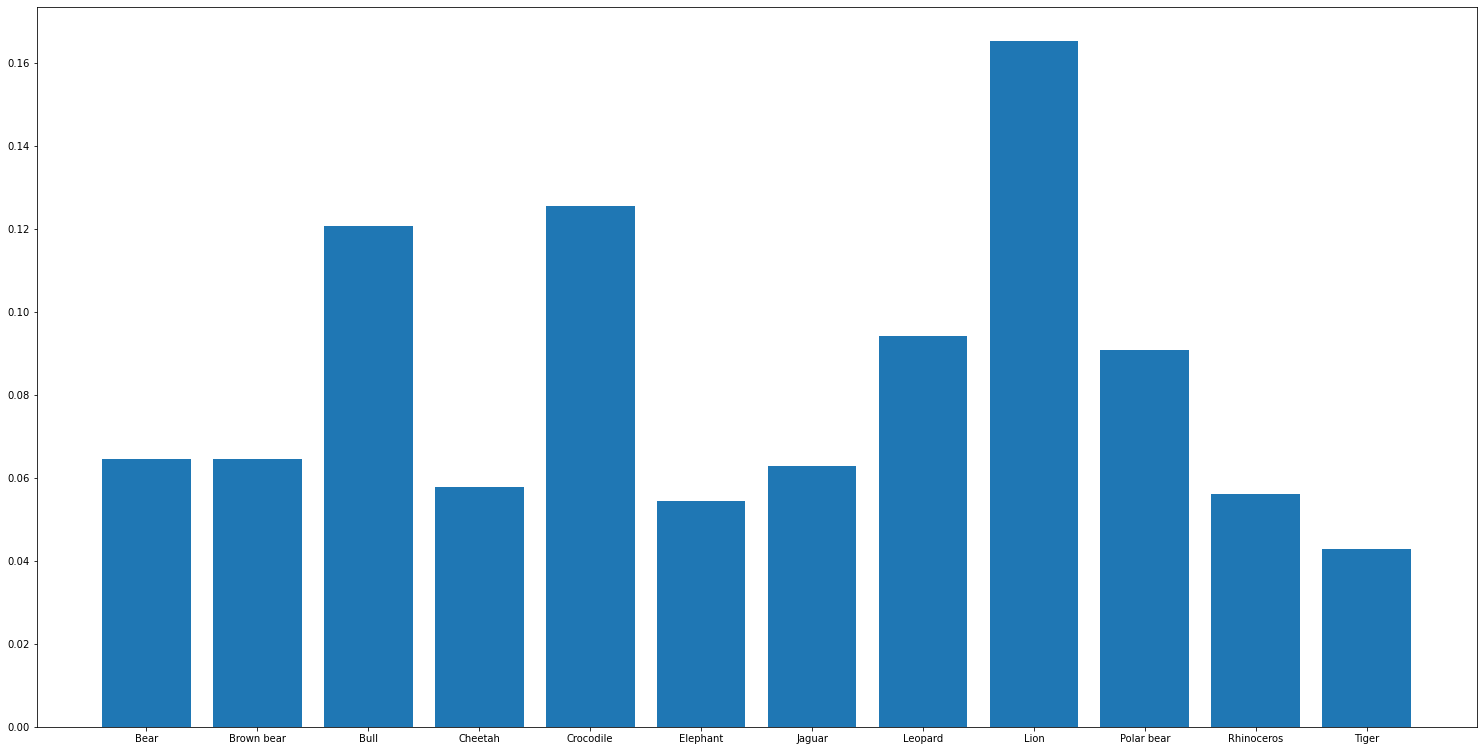

In [4]:
test_image_bear = len(os.listdir("Animal_Dataset_Sorted/test/Bear"))-1
test_image_brown_bear = len(os.listdir("Animal_Dataset_Sorted/test/Brown bear"))-1
test_image_bull = len(os.listdir("Animal_Dataset_Sorted/test/Bull"))-1
test_image_cheetah = len(os.listdir("Animal_Dataset_Sorted/test/Cheetah"))-1
test_image_crocodile = len(os.listdir("Animal_Dataset_Sorted/test/Crocodile"))-1
test_image_elephant = len(os.listdir("Animal_Dataset_Sorted/test/Elephant"))-1
test_image_jaguar = len(os.listdir("Animal_Dataset_Sorted/test/Jaguar"))-1
test_image_leopard = len(os.listdir("Animal_Dataset_Sorted/test/Leopard"))-1
test_image_lion = len(os.listdir("Animal_Dataset_Sorted/test/Lion"))-1
test_image_polar_bear = len(os.listdir("Animal_Dataset_Sorted/test/Polar bear"))-1
test_image_rhinoceros = len(os.listdir("Animal_Dataset_Sorted/test/Rhinoceros"))-1
test_image_tiger = len(os.listdir("Animal_Dataset_Sorted/test/Tiger"))-1
print("Bear sample size : ",test_image_bear,"\n")
print("Brown bear sample size : ",test_image_brown_bear,"\n")
print("Bull sample size : ",test_image_bull,"\n")
print("Cheetah sample size : ",test_image_cheetah,"\n")
print("Crocodile sample size : ",test_image_crocodile,"\n")
print("Elephant sample size : ",test_image_elephant,"\n")
print("Jaguar sample size : ",test_image_jaguar,"\n")
print("Leopard sample size : ",test_image_leopard,"\n")
print("Lion sample size : ",test_image_lion,"\n")
print("Polar bear sample size : ",test_image_polar_bear,"\n")
print("Rhinoceros sample size : ",test_image_rhinoceros,"\n")
print("Tiger sample size : ",test_image_tiger,"\n")
validation_data_size = test_image_bear+test_image_brown_bear+test_image_bull+test_image_cheetah+test_image_crocodile+test_image_elephant+test_image_jaguar+test_image_leopard+test_image_lion+test_image_polar_bear+test_image_rhinoceros+test_image_tiger
occurences = [test_image_bear/validation_data_size ,test_image_brown_bear/validation_data_size ,test_image_bull/validation_data_size ,test_image_cheetah/validation_data_size ,test_image_crocodile/validation_data_size ,test_image_elephant/validation_data_size ,test_image_jaguar/validation_data_size,test_image_leopard/validation_data_size,test_image_lion/validation_data_size,test_image_polar_bear/validation_data_size,test_image_rhinoceros/validation_data_size,test_image_tiger/validation_data_size]
print("validation data size:",validation_data_size)

fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Bear","Brown bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Polar bear","Rhinoceros","Tiger"],occurences)

    

In [5]:
animals_to_detect = ["Bear","Brown bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Polar bear","Rhinoceros","Tiger"]

In [6]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [7]:
size = (640,640)
for animal_specie in animals_to_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img) 

In [8]:
animals_to_detect = ["Bear","Brown bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Polar bear","Rhinoceros","Tiger"]
animals_encoding = {"Bear":0,"Brown bear":1,"Bull":2,"Cheetah":3,"Crocodile":4,"Elephant":5,"Jaguar":6,"Leopard":7,"Lion":8,"Polar bear":9,"Rhinoceros":10,"Tiger":11}

In [9]:
def process_files(input_files_path, output_files_path):    
    for animal_specie in animals_to_detect:
        print(animal_specie)
        txt_file_name = os.listdir(input_files_path + "/" + animal_specie + "/Label")
        print(txt_file_name)
        for i in range(0, len(txt_file_name)):
            with open(input_files_path + "/" + animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                with open(output_files_path + "/" + txt_file_name[i], "w") as destination:
                    image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                    img = cv2.imread(input_files_path + "/" + animal_specie + "/" + image_file_name_no_ext + ".jpg", cv2.IMREAD_COLOR)
                    height = img.shape[0]
                    width = img.shape[1]
                    for line in source:
                        labeling_data = line.split()
                        labeling_data = list(re.findall(r"(\w+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)", line)[0])
                        label = labeling_data[0].strip()
                        if label in animals_encoding:
                            labeling_data[0] = animals_encoding[label]
                            xmin = float(labeling_data[1])
                            ymin = float(labeling_data[2])
                            xmax = float(labeling_data[3])
                            ymax = float(labeling_data[4])
                            cx = (xmin + xmax) / 2.0 / width
                            cy = (ymin + ymax) / 2.0 / height
                            box_width = (xmax - xmin) / width
                            box_height = (ymax - ymin) / height
                            destination.write(str(labeling_data[0]) + " ")
                            destination.write(str(cx) + " ")
                            destination.write(str(cy) + " ")
                            destination.write(str(box_width) + " ")
                            destination.write(str(box_height) + "\n")


In [10]:
process_files("Animal_Dataset_Sorted/train","yolo/train/labels")


Bear
['0155b267ade95d1e.txt', '01650042709e7a82.txt', '02d4376234375c2f.txt', '02f783a758aec795.txt', '0312356c607c20dc.txt', '04af0dc0511cb98d.txt', '04e79e5f419a711a.txt', '0594ed3b52d3c222.txt', '05d7d61e5e8a8169.txt', '060e6719ae46dea6.txt', '06707f578721048c.txt', '073f21a5b0fa62dc.txt', '079e864735144122.txt', '07e64bb137734dbf.txt', '082849a1549c56b7.txt', '0a85e62973f2bcf6.txt', '0beb68cc85f20f4c.txt', '0c00c86cca098160.txt', '0c367abe78cbcf6d.txt', '0cb082f518f55fc3.txt', '0e656ab17f715b23.txt', '0e908c10c31c54d5.txt', '0fb433aa35b7d44a.txt', '112076aeba9d4d0c.txt', '1131287683bc922c.txt', '12543cb664a87734.txt', '127ce2dec6c6978f.txt', '15d276d673cf5de5.txt', '17aa9d00d16ef360.txt', '17b4237cafa91eb3.txt', '17c823ab5eeb6a69.txt', '19ae56cc2d93a9bf.txt', '1aa1ff24b8e00fc1.txt', '20500caecb550ddf.txt', '217b1cf5a47223cc.txt', '26cf30a2c11b09ed.txt', '28094041a4a51400.txt', '28730164e406e4ac.txt', '29581b154cf9ef55.txt', '2e2e26a9c8d4c609.txt', '34d2f34ce7edc12c.txt', '4307ec32a

Crocodile
['00980117bd3595ca.txt', '01cb17fd76b54df9.txt', '02821806e7bb9db1.txt', '03f8df875f27be8a.txt', '0453eead640962ae.txt', '0748377955b5316c.txt', '079c78950a657008.txt', '081ab02a944124f8.txt', '08d447dbb08f5ce8.txt', '0c05d442d679222f.txt', '0c957a36b006d373.txt', '0d36a4962702f795.txt', '0d9e02617d5939da.txt', '0eaba1786fb24fdf.txt', '0ed49697b9ad6796.txt', '0f3be371590e6697.txt', '12fc9cbc1ae80cdc.txt', '141d3b45da0c0b6a.txt', '1483fb69a488d4a7.txt', '1565397df2da0c4c.txt', '174ac159861ff5d5.txt', '17dfee10a628f5e5.txt', '18f2c9afca7c1db2.txt', '1968bb6ca928f841.txt', '1c237d305fe3ff1f.txt', '1ceb85bdd99fa986.txt', '1f22d82469efd731.txt', '21383690b9020539.txt', '214c12e887b09528.txt', '230ce79f25812cfd.txt', '23674643f905f784.txt', '257cdc93fc6b71b8.txt', '286f069b703d9664.txt', '2910afe42dca6270.txt', '291ef8c7818391d6.txt', '2a9caaed128ab4a4.txt', '2c6ffab4f46d08d5.txt', '2ce948ca7df8204f.txt', '2ce98eac3eec129f.txt', '2e6d7c96b4a4fbe7.txt', '2e9216633cfbff22.txt', '3147

Leopard
['00faed7a340a1101.txt', '0107395b9550040b.txt', '01efa3d259d95396.txt', '02213bb42b24841a.txt', '025d25975e4275a2.txt', '025ee4909cb7e97e.txt', '02f3eff22241f28d.txt', '0371627add32994f.txt', '03de3c7807d59601.txt', '05101fc57a1cddb9.txt', '05369add5239d3db.txt', '06d29b1f55dffe75.txt', '07642e275bb2b869.txt', '088d2b1af532f609.txt', '0c91224924f49890.txt', '0c9b1234e6efeaed.txt', '0d8bdffd0fa41b84.txt', '0e37579ded599075.txt', '0e8cae40d9ecc314.txt', '100984ad300bc000.txt', '10c2d9eed23378c5.txt', '1111983278b100e8.txt', '113fbf2203ccef57.txt', '1156515b1c0490fe.txt', '137e80a3d6afce59.txt', '13f5e8d42c3995c1.txt', '1512b780c970baa7.txt', '15b157fcf5d37105.txt', '16619f94dec8010c.txt', '166d6bfacff86039.txt', '17ae168666e01588.txt', '1848d8b3366aafe8.txt', '1b94c30d1407cc6c.txt', '1e76a6bc203153ba.txt', '23edc1fa74c892b7.txt', '24577575fe3a68d2.txt', '2478080c7c749c9b.txt', '2546b57e18682a68.txt', '25c9037366f5d1fa.txt', '26567c3c02e3feff.txt', '265896f3a94bd420.txt', '26e13c

Rhinoceros
['00a91238f4559e64.txt', '00ce44590d02a7d4.txt', '0109a40779eeda31.txt', '01742ec399d1cca0.txt', '0286b21fe4140ed8.txt', '028ea807844709b2.txt', '02bbfa0c4140075b.txt', '0300b2d3bd9a7b92.txt', '03256484204ab58f.txt', '033768fb47bd89fb.txt', '035ea20cca152c38.txt', '0411692d90465e2e.txt', '0480a1fd30169f12.txt', '04ff53db697485e6.txt', '050abc96719c48c4.txt', '0535586c8e65ef1e.txt', '055f06a0e14c123d.txt', '05cca534d6ec740e.txt', '05e6301eaced8bfd.txt', '06f7fbf54b506adf.txt', '0730a03391894ca7.txt', '07cb3d9522a41e3e.txt', '07db8659ca2c22e0.txt', '0811c6713813cfff.txt', '088a72d6f81f4fe1.txt', '0921d9f73ab3104e.txt', '0988a87d31701f1c.txt', '0a5830b82c0020fe.txt', '0a9bc1237531516c.txt', '0ab3a094b97654ec.txt', '0abb06db298db783.txt', '0c3266976c2d833e.txt', '0c722452ed13a8ce.txt', '0cf12b04655cf81e.txt', '0d166a857d471fed.txt', '0d8964aeda393248.txt', '0db5d9cc2d03d7e5.txt', '0e2287c03a0cffc1.txt', '0f40899f1d9a08d4.txt', '0ff30c5a510e6d83.txt', '108ebf7909c7cebb.txt', '111

In [11]:
process_files("Animal_Dataset_Sorted/test","yolo/test/labels")


Bear
['0df78ee76bafd3a9.txt', '0f899aca6d0fb6e1.txt', '1cca48c57103a42c.txt', '1fa809bf6cf5ea36.txt', '200046eca85cd992.txt', '23bf858cb1d0ef63.txt', '23d1d39d81d411da.txt', '322e901e952ea866.txt', '3d77555f2ede0b38.txt', '3df2b6a098712fee.txt', '41b188a87b9cb7d9.txt', '50100f0b149c5668.txt', '5e4722478ab9c699.txt', '685ec158610ee9c3.txt', '6c413bd13881e4ea.txt', '77d8f1427530d52c.txt', '835f500b4f18425a.txt', '84c540da3f9e5436.txt', '8c3a0db73abdfed4.txt', '981ff8cfd891a39a.txt', '9e411cef88b11bb7.txt', 'a043c1c94c493735.txt', 'a725b87082af9473.txt', 'aadda77be1e8bc0b.txt', 'ab68f7a2c2575ff6.txt', 'ae4e59f858eb042a.txt', 'aea7138636948eee.txt', 'b2d92399ba4b0328.txt', 'bb2d5daedea06da5.txt', 'bcd925c7811ff07b.txt', 'c087a950d5217c13.txt', 'c95acf66771a868e.txt', 'cb48bf7102604c06.txt', 'cbcd47e43104de25.txt', 'de4f80f11b9dcb1b.txt', 'eab56e74f42e5286.txt', 'ee8b8d14a20aaca8.txt', 'f0cd1050b09dd625.txt', 'fc5221a9c7909df6.txt']
Brown bear
['009ebd2e28a2f9da.txt', '037ce70dca241ef6.txt'

Lion
['0149d723dbc0d724.txt', '03b9630d0ba5749d.txt', '03bacd7be83b721e.txt', '06e9b526a94fb4ef.txt', '08b6978e96007bfe.txt', '08e3bd71231faa7c.txt', '0abe5e4f09bc1262.txt', '0c13fc8f316fbf64.txt', '0fb728cd2b86cb10.txt', '14dba23948cf4ecd.txt', '15995ad37d077a54.txt', '1cdf54e23522721f.txt', '1ebb36368847d8c9.txt', '209a730031941da7.txt', '21b0a18099394d3f.txt', '21dfe5721a39e647.txt', '2714b054d4e7d4ed.txt', '2759665ea086956a.txt', '27eea2d0cf6618aa.txt', '29910133de9c9f32.txt', '2b42f3325e3be31b.txt', '2e7636f4a945129e.txt', '2f2c0984cb427e81.txt', '2fc33f14c91f74d7.txt', '320320e0a5ae5375.txt', '3259ead2f4e02ba2.txt', '3452ab13dfd7cd45.txt', '37968c5f1b3ac4fa.txt', '3bb7558c430c06de.txt', '3cd87292fc5757dc.txt', '450f18ba8939e75d.txt', '4b356e74c4f14ef8.txt', '4d51b08a4f17a99e.txt', '5069d2a610a2081c.txt', '54eb04cc46cf8d07.txt', '57370d36110080f6.txt', '573ca1d8f41e1307.txt', '576349a03b599011.txt', '61f9e2ac8b438a2f.txt', '63eea08ae3c49842.txt', '697918b27c87dafb.txt', '6d491fd91

In [12]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

C:\Users\user\Documents\Programming_Stuffs\vscode\Programs\Python_Programs\Jupyter Notebook\Animal Detection MiniProject\yolov5


Cloning into 'yolov5'...


Note: you may need to restart the kernel to use updated packages.


In [34]:
#!touch data/animals.yaml
#%ls data
import os

file_path = 'data/animals.yaml'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Bear"+"\n")
    yaml_file.write(" 1: Brown bear"+"\n")
    yaml_file.write(" 2: Bull"+"\n")
    yaml_file.write(" 3: Cheetah"+"\n")
    yaml_file.write(" 4: Crocodile"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Jaguar"+"\n")
    yaml_file.write(" 7: Leopard"+"\n")
    yaml_file.write(" 8: Lion"+"\n")
    yaml_file.write(" 9: Polar bear"+"\n")
    yaml_file.write(" 10: Rhinoceros"+"\n")
    yaml_file.write(" 11: Tiger"+"\n")
%ls data



 Volume in drive C is Windows
 Volume Serial Number is D2CF-9380

 Directory of C:\Users\user\Documents\Programming_Stuffs\vscode\Programs\Python_Programs\Jupyter Notebook\Animal Detection MiniProject\yolov5\data

01-06-2023  20:25    <DIR>          .
01-06-2023  20:14    <DIR>          ..
01-06-2023  20:25               362 animals.yaml
01-06-2023  20:14             2,808 Argoverse.yaml
01-06-2023  20:14             2,612 coco.yaml
01-06-2023  20:14             1,954 coco128.yaml
01-06-2023  20:14             1,970 coco128-seg.yaml
01-06-2023  20:14             1,940 GlobalWheat2020.yaml
01-06-2023  20:14    <DIR>          hyps
01-06-2023  20:14            19,894 ImageNet.yaml
01-06-2023  20:14    <DIR>          images
01-06-2023  20:14             9,641 Objects365.yaml
01-06-2023  20:14    <DIR>          scripts
01-06-2023  20:14             2,395 SKU-110K.yaml
01-06-2023  20:14             3,042 VisDrone.yaml
01-06-2023  20:14             3,594 VOC.yaml
01-06-2023  20:14            

Content of the animals.yaml file, we will start filling the yaml file with the red-colored content presented below 

In [ ]:
"""with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Bear"+"\n")
    yaml_file.write(" 1: Brown bear"+"\n")
    yaml_file.write(" 2: Bull"+"\n")
    yaml_file.write(" 3: Cheetah"+"\n")
    yaml_file.write(" 4: Crocodile"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Jaguar"+"\n")
    yaml_file.write(" 7: Leopard"+"\n")
    yaml_file.write(" 8: Lion"+"\n")
    yaml_file.write(" 9: Polar bear"+"\n")
    yaml_file.write(" 10: Rhinoceros"+"\n")
    yaml_file.write(" 11: Tiger"+"\n")
"""

In [35]:
!python train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5s.pt --project runs/train

train: weights=yolov5s.pt, cfg=, data=animals.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\user\Documents\Programming_Stuffs\vscode\Programs\Python_Programs\Jupyter': No such file or directory
YOLOv5  2023-6-1 Python-3.9.12 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1

 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 16           [-1, 4]  1         0  models.common.Concat                    [1]                           
 17                -1  1     90880  models.common.C3                        [256, 128, 1, False]          
 18                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 19          [-1, 14]  1         0  m

In [37]:
#!cp /yolov5/runs/train/exp/weights/best.pt /Model
import shutil

# Source and destination file paths
source_file = '/yolov5/runs/train/exp/weights/best.pt'
destination_file = '/Model/'

# Copy the file
shutil.copy(source_file, destination_file)





FileNotFoundError: [Errno 2] No such file or directory: '/yolov5/runs/train/exp/weights/best.pt'

In [ ]:
import cv2
import torch
import numpy as np

class_names = ["Bear","Brown bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Polar bear","Rhinoceros","Tiger"]

camera = cv2.VideoCapture(0)

def detect_objects(camera, class_names, confidence_threshold, model_path):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
    model.conf = confidence_threshold
    
    while True:

        ret, frame = camera.read()
        
        with torch.no_grad():
            results = model(frame)
    
        predictions = results.pandas().xyxy[0]
        predictions = predictions[predictions['confidence'] >= confidence_threshold]
        labels = predictions['class'].astype(int).tolist()
        boxes = predictions[['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()
        
        print(predictions)
        print(boxes)
        
        for label, box in zip(labels, boxes):
            if len(box) != 4:
                print(f"Invalid box: {box}")
                continue
            x_min, y_min, x_max, y_max = map(int, box)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(frame, class_names[label], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    camera.release()
    cv2.destroyAllWindows()

detect_objects(camera, class_names, confidence_threshold=0.5, model_path='best2.pt')
